In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
df=pd.read_csv('balanced_cleaned_train_dataset.csv')
test_set=pd.read_csv('testset.csv')

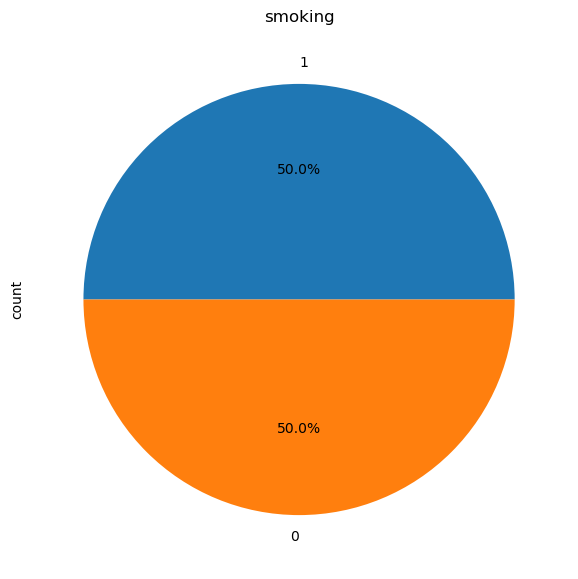

In [3]:
fig, axes = plt.subplots(figsize=(7, 7))
df['smoking'].value_counts().plot.pie(autopct='%1.1f%%')
axes.set_title('smoking')
plt.show()

In [4]:
X=df.drop('smoking',axis=1)
y=df['smoking']


X_test= test_set.drop('smoking', axis=1)
y_test = test_set['smoking']

In [5]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 100, 600, step=20)
    max_depth = trial.suggest_int('max_depth', 5, 25)
    max_features = trial.suggest_int('max_features', 3, 23)

    scores = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        
        
        
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            random_state=42,
            n_jobs=-1 , 
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        # precision = precision_score(y_val, y_pred, average='macro')
        # recall = recall_score(y_val, y_pred, average='macro')
        # f1 = f1_score(y_val, y_pred, average='macro')

        # print(f"Fold {fold + 1}:")
        # print(f"  Accuracy:  {acc:.4f}")
        # print(f"  Precision: {precision:.4f}")
        # print(f"  Recall:    {recall:.4f}")
        # print(f"  F1 Score:  {f1:.4f}")
        # print("-" * 30)

        y_pred_train = rf.predict(X_train)
        acc_train = accuracy_score(y_train, y_pred_train)
        overfit_penalty = abs(acc_train - acc)
        score = 0.5 * acc - 0.5 * overfit_penalty

        scores.append(score)

    return np.mean(scores)

sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=20)  


print("best_params:", study.best_params)
print(f"best_value: {study.best_value:.4f}")

[I 2025-08-23 16:50:32,205] A new study created in memory with name: no-name-f1758530-864c-4240-9c35-9e7de69b42e4
[I 2025-08-23 16:50:48,422] Trial 0 finished with value: 0.32748124999999995 and parameters: {'n_estimators': 280, 'max_depth': 24, 'max_features': 18}. Best is trial 0 with value: 0.32748124999999995.
[I 2025-08-23 16:50:52,974] Trial 1 finished with value: 0.41000625 and parameters: {'n_estimators': 400, 'max_depth': 8, 'max_features': 6}. Best is trial 1 with value: 0.41000625.
[I 2025-08-23 16:50:58,948] Trial 2 finished with value: 0.32709999999999995 and parameters: {'n_estimators': 120, 'max_depth': 23, 'max_features': 15}. Best is trial 1 with value: 0.41000625.
[I 2025-08-23 16:51:08,783] Trial 3 finished with value: 0.4128125000000001 and parameters: {'n_estimators': 460, 'max_depth': 5, 'max_features': 23}. Best is trial 3 with value: 0.4128125000000001.
[I 2025-08-23 16:51:15,375] Trial 4 finished with value: 0.40588750000000007 and parameters: {'n_estimators': 

best_params: {'n_estimators': 480, 'max_depth': 5, 'max_features': 23}
best_value: 0.4129


In [6]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    

    rf = RandomForestClassifier(
            n_estimators=480,
            max_depth=5,
            max_features=23,
            random_state=42,
            

        )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')

    y_pred_train = rf.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)

    print(f"Fold {fold + 1}:")
    print(f"  val Accuracy:  {acc:.4f}")
    print(f"  train Accuracy:  {acc_train:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    print("-" * 30)

   
    print(f"Fold {fold + 1} Classification Report:")
    print(classification_report(y_val, y_pred, digits=2))
    print("-" * 40)
    
    scores.append(acc)

    avg_acc = np.mean(scores)

Fold 1:
  val Accuracy:  0.8255
  train Accuracy:  0.8324
  Precision: 0.8399
  Recall:    0.8255
  F1 Score:  0.8236
------------------------------
Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      2000
           1       0.77      0.93      0.84      2000

    accuracy                           0.83      4000
   macro avg       0.84      0.83      0.82      4000
weighted avg       0.84      0.83      0.82      4000

----------------------------------------
Fold 2:
  val Accuracy:  0.8347
  train Accuracy:  0.8315
  Precision: 0.8463
  Recall:    0.8348
  F1 Score:  0.8334
------------------------------
Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      2000
           1       0.78      0.93      0.85      2000

    accuracy                           0.83      4000
   macro avg       0.85      0.83      0.83      4000
we

In [7]:
rf_final = RandomForestClassifier(
     n_estimators=480,
            max_depth=5,
            max_features=23,
            random_state=42,
)
rf_final.fit(X, y)  

y_test_pred = rf_final.predict(X_test)

acc_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='macro')
recall_test = recall_score(y_test, y_test_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')

train_pred = rf_final.predict(X)  
train_acc = accuracy_score(y, train_pred)
print(f"Train Accuracy: {train_acc:.4f}, test Accuracy: {acc_test:.4f}")

print(f"Test set Accuracy:  {acc_test:.4f}")
print(f"Test set Precision: {precision_test:.4f}")
print(f" Test set Recall:    {recall_test:.4f}")
print(f" Test set F1 Score:  {f1_test:.4f}")
print("\n Test set classification report:")
print(classification_report(y_test, y_test_pred, digits=4))

Train Accuracy: 0.8312, test Accuracy: 0.8360
Test set Accuracy:  0.8360
Test set Precision: 0.8480
 Test set Recall:    0.8360
 Test set F1 Score:  0.8346

 Test set classification report:
              precision    recall  f1-score   support

           0     0.9128    0.7430    0.8192      1000
           1     0.7833    0.9290    0.8500      1000

    accuracy                         0.8360      2000
   macro avg     0.8480    0.8360    0.8346      2000
weighted avg     0.8480    0.8360    0.8346      2000

